## Assignment 10

### Load and Read files

In [387]:
# load numpy 
import numpy as np
# load pandas
import pandas as pd

In [388]:
# Read CSV file
untidy= pd.read_csv('https://raw.githubusercontent.com/sunpark92/DAV-5400/master/Untidy%20Data.csv')

In [389]:
# Counts rows and columns 
untidy.shape

(5, 7)

In [390]:
# load the data
untidy

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [391]:
# drop a row that all values are NaN
untidy=untidy.drop(index=[2])

In [392]:
# rename the columns
untidy=untidy.rename(columns = {'Unnamed: 0':'Airlines', 'Unnamed: 1': 'time/delayed'})
untidy

,Airlines,time/delayed,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AM WEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


### Reshaped/transformed data

In [393]:
# melt data
untidy=pd.melt(untidy)
untidy

,variable,value
0,Airlines,ALASKA
1,Airlines,NaN
2,Airlines,AM WEST
3,Airlines,NaN
4,time/delayed,on time
5,time/delayed,delayed
6,time/delayed,on time
7,time/delayed,delayed
8,Los Angeles,497
9,Los Angeles,62


In [394]:
# remove NaN values
untidy=untidy.dropna()
untidy

,variable,value
0,Airlines,ALASKA
2,Airlines,AM WEST
4,time/delayed,on time
5,time/delayed,delayed
6,time/delayed,on time
7,time/delayed,delayed
8,Los Angeles,497
9,Los Angeles,62
10,Los Angeles,694
11,Los Angeles,117


In [395]:
# add two rows at the bottom of the DataFrame
untidy.loc[1] = {'variable':'Airlines','value':'ALASKA'}
untidy.loc[3] = {'variable':'Airlines','value':'AM WEST'}
untidy

/Users/sunheepark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,variable,value
0,Airlines,ALASKA
2,Airlines,AM WEST
4,time/delayed,on time
5,time/delayed,delayed
6,time/delayed,on time
7,time/delayed,delayed
8,Los Angeles,497
9,Los Angeles,62
10,Los Angeles,694
11,Los Angeles,117


In [396]:
# sort by index
untidy=untidy.sort_index()
untidy 

,variable,value
0,Airlines,ALASKA
1,Airlines,ALASKA
2,Airlines,AM WEST
3,Airlines,AM WEST
4,time/delayed,on time
5,time/delayed,delayed
6,time/delayed,on time
7,time/delayed,delayed
8,Los Angeles,497
9,Los Angeles,62


In [397]:
# split dataframe
list1=untidy[untidy['variable']=='Airlines']
# delete a column which has 'Airlines'
list1=list1[['value']]

In [398]:
# Rename column as 'Airlines'
list1=list1.rename(columns = {'value':'Airlines'})
list1

,Airlines
0,ALASKA
1,ALASKA
2,AM WEST
3,AM WEST


In [399]:
# split dataframe
list2=untidy[untidy['variable']=='time/delayed']
list2=list2[['value']]

In [400]:
# Rename column as 'time/delayed'
list2=list2.rename(columns = {'value':'time/delayed'})
# reset index to combine list1 and list2
list2=list2.reset_index()
list2

,index,time/delayed
0,4,on time
1,5,delayed
2,6,on time
3,7,delayed


In [401]:
# combine two dataframe
list2=pd.concat([list1,list2], axis=1)
list2=list2[['Airlines','time/delayed']]
list2

,Airlines,time/delayed
0,ALASKA,on time
1,ALASKA,delayed
2,AM WEST,on time
3,AM WEST,delayed


In [402]:
# split dataframe
list3=untidy[untidy['variable']=='Los Angeles ']
list3

,variable,value
8,Los Angeles,497
9,Los Angeles,62
10,Los Angeles,694
11,Los Angeles,117


In [403]:
# split dataframe
list4=untidy[untidy['variable']=='Phoenix']
list4

,variable,value
12,Phoenix,221
13,Phoenix,12
14,Phoenix,4840
15,Phoenix,415


In [404]:
# split dataframe
list5=untidy[untidy['variable']=='San Diego']
list5

,variable,value
16,San Diego,212
17,San Diego,20
18,San Diego,383
19,San Diego,65


In [405]:
# split dataframe
list6=untidy[untidy['variable']=='San Francisco']
list6 

,variable,value
20,San Francisco,503
21,San Francisco,102
22,San Francisco,320
23,San Francisco,129


In [406]:
# split dataframe
list7=untidy[untidy['variable']=='Seattle']
list7

,variable,value
24,Seattle,1841
25,Seattle,305
26,Seattle,201
27,Seattle,61


In [407]:
# combine list 2 several times for combining the other dataframe(list9) 
list8=pd.concat([list2, list2, list2, list2, list2])
# reset index for combining the other dataframe(list9)
list8=list8.reset_index()
# only remain column 'Airlines','time/delayed'
list8=list8[['Airlines','time/delayed']]
list8

,Airlines,time/delayed
0,ALASKA,on time
1,ALASKA,delayed
2,AM WEST,on time
3,AM WEST,delayed
4,ALASKA,on time
5,ALASKA,delayed
6,AM WEST,on time
7,AM WEST,delayed
8,ALASKA,on time
9,ALASKA,delayed


In [408]:
# create list9 by combining list3-7 to be combined with list 8
list9=pd.concat([list3, list4, list5, list6, list7])
# reset index
list9=list9.reset_index()
list9

,index,variable,value
0,8,Los Angeles,497
1,9,Los Angeles,62
2,10,Los Angeles,694
3,11,Los Angeles,117
4,12,Phoenix,221
5,13,Phoenix,12
6,14,Phoenix,4840
7,15,Phoenix,415
8,16,San Diego,212
9,17,San Diego,20


In [409]:
# remove 'index' column
list9=list9[['variable','value']]
list9

,variable,value
0,Los Angeles,497
1,Los Angeles,62
2,Los Angeles,694
3,Los Angeles,117
4,Phoenix,221
5,Phoenix,12
6,Phoenix,4840
7,Phoenix,415
8,San Diego,212
9,San Diego,20


In [514]:
# combine list 8 with list 9
list10=pd.concat([list8,list9], axis=1)
# rename columns
list10=list10.rename(columns = {'variable':'City'})
list10=list10.rename(columns = {'value':'count'})
# sort dataframe by 'time/delayed'
list10=list10.sort_values('City')
list10

,Airlines,time/delayed,City,count
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,4840
7,AM WEST,delayed,Phoenix,415
11,AM WEST,delayed,San Diego,65
10,AM WEST,on time,San Diego,383


### Tidy data - long format structure

In [515]:
# reset index
list10=list10.reset_index()
# remove unnecessary column
list10=list10[['Airlines','time/delayed','City','count']]
list10

,Airlines,time/delayed,City,count
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,62
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,4840
7,AM WEST,delayed,Phoenix,415
8,AM WEST,delayed,San Diego,65
9,AM WEST,on time,San Diego,383


In [487]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

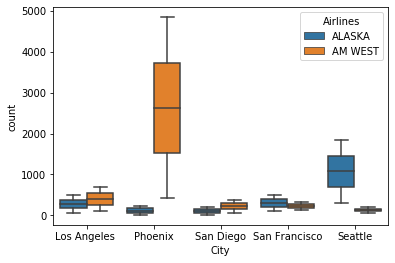

In [488]:
# Visualized data to show which airlines mostly goes specific city
sns.boxplot(x="City",
            y="count",
            hue="Airlines",
            data=list10)

### A question I might choose to answer:

__Q) Which airlines mostly goes specific city?__

- A) AM WEST mostly goes to Phoenix and ALASKA mostly goes to Seattle. 


Finally, given your “tidy” long format structure, consider what, if any, changes you would make to the visual presentation of the data if you were then asked to transform your “long” data back into a “wide” format: would you mimic the structure of the graphic shown above? If not, how might you transform your “long” data to “wide” format to make its “wide” presentation easier to understand and work with? Provide an example of your recommendation.

#### I am going to create a wide format like this if I was asked to transfrom the "long data" back into a "wide" format group by City

In [565]:
# use pivot tables to convert table and store in 'wide'
wide_format = pd.pivot(list10, values='count', index='count', columns='City')
# use pd.DataFrame(df.unstack()) to unstack 'wide' table
wide_format = pd.DataFrame(wide_format.unstack())
wide_format

0
City          count       
Los Angeles   12.0     NaN
              20.0     NaN
              61.0     NaN
              62.0      62
              65.0     NaN
              102.0    NaN
              117.0    117
              129.0    NaN
              201.0    NaN
              212.0    NaN
              221.0    NaN
              305.0    NaN
              320.0    NaN
              383.0    NaN
              415.0    NaN
              497.0    497
              503.0    NaN
              694.0    694
              1841.0   NaN
              4840.0   NaN
Phoenix       12.0      12
              20.0     NaN
              61.0     NaN
              62.0     NaN
              65.0     NaN
              102.0    NaN
              117.0    NaN
              129.0    NaN
              201.0    NaN
              212.0    NaN
...                    ...
San Francisco 221.0    NaN
              305.0    NaN
              320.0    320
              383.0    NaN
              415.0    NaN
              497.0    NaN
              503.0    503
              694.0    NaN
              1841.0   NaN
              4840.0   NaN
Seattle       12.0     NaN
              20.0     NaN
              61.0      61
              62.0     NaN
              65.0     NaN
              102.0    NaN
              117.0    NaN
              129.0    NaN
              201.0    201
              212.0    NaN
              221.0    NaN
              305.0    305
              320.0    NaN
              383.0    NaN
              415.0    NaN
              497.0    NaN
              503.0    NaN
              694.0    NaN
              1841.0  1841
              4840.0   NaN

[100 rows x 1 columns]